In [1]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import skew
import sklearn
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
#Accessing performance using Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics
import pickle
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df_1= pd.read_csv('Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')

In [3]:
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [4]:
df_2= pd.read_csv('Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv')


In [5]:
df_2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [6]:
df_3= pd.read_csv('Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df_4= pd.read_csv('Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df_5= pd.read_csv('Resale flat prices based on registration date from Jan-2017 onwards.csv')


In [7]:
df_3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [8]:
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [9]:
df_5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [10]:
df=pd.concat([df_1,df_2,df_3,df_4,df_5],ignore_index=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [11]:
df[['year', 'month']] = df['month'].str.split('-', expand=True)
df[['storey_start', 'storey_end']] = df['storey_range'].str.split('TO',expand=True)
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])
df['resale_price']=pd.to_numeric(df['resale_price'])
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])

df.drop(columns='storey_range',inplace=True)

In [12]:
df.shape

(938269, 13)

In [13]:
df.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
year                     int64
storey_start             int64
storey_end               int64
dtype: object

In [14]:
df['town'].value_counts()

town
TAMPINES           80722
YISHUN             70785
JURONG WEST        67442
BEDOK              67182
WOODLANDS          66336
ANG MO KIO         52528
HOUGANG            51317
BUKIT BATOK        45128
CHOA CHU KANG      38837
BUKIT MERAH        34767
PASIR RIS          33475
SENGKANG           33354
TOA PAYOH          31870
QUEENSTOWN         29063
GEYLANG            28468
CLEMENTI           28268
BUKIT PANJANG      28039
KALLANG/WHAMPOA    27613
JURONG EAST        25010
SERANGOON          23008
PUNGGOL            21490
BISHAN             21425
SEMBAWANG          14219
MARINE PARADE       8097
CENTRAL AREA        7218
BUKIT TIMAH         2544
LIM CHU KANG          64
Name: count, dtype: int64

In [15]:
df['town']=df['town'].replace({'MARINE PARADE': 'Others'})
df['town']=df['town'].replace({'CENTRAL AREA': 'Others'})
df['town']=df['town'].replace({'BUKIT TIMAH': 'Others'})
df['town']=df['town'].replace({'LIM CHU KANG': 'Others'})


In [16]:
sorted(df['town'].unique())

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'Others',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN']

In [17]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [18]:
df['flat_type'].value_counts()

flat_type
4 ROOM              357125
3 ROOM              298695
5 ROOM              198050
EXECUTIVE            70386
2 ROOM               12162
1 ROOM                1307
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [19]:
df['flat_type']=df['flat_type'].replace({'EXECUTIVE': 'Others'})
df['flat_type']=df['flat_type'].replace({'2 ROOM': 'Others'})
df['flat_type']=df['flat_type'].replace({'1 ROOM': 'Others'})
df['flat_type']=df['flat_type'].replace({'MULTI GENERATION': 'Others'})
df['flat_type']=df['flat_type'].replace({'MULTI-GENERATION': 'Others'})


In [20]:
df['flat_type'].value_counts()

flat_type
4 ROOM    357125
3 ROOM    298695
5 ROOM    198050
Others     84399
Name: count, dtype: int64

In [21]:
df['flat_type'].unique()

array(['Others', '3 ROOM', '4 ROOM', '5 ROOM'], dtype=object)

In [22]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17742
BEDOK RESERVOIR RD    14834
ANG MO KIO AVE 10     13913
ANG MO KIO AVE 3      12240
HOUGANG AVE 8          9419
                      ...  
SENGKANG WEST RD          5
MARINE PARADE CTRL        3
TAMPINES NTH DR 1         3
CANBERRA VIEW             2
ALJUNIED AVE 2            1
Name: count, Length: 588, dtype: int64

In [23]:
v_c = df['street_name'].value_counts()
freq = (v_c[v_c<5000]).index

unique_once_list = list(freq)
unique_once_list

['YISHUN ST 11',
 'YISHUN ST 21',
 'JURONG WEST ST 81',
 'WOODLANDS ST 13',
 'YISHUN ST 61',
 'BISHAN ST 13',
 'JURONG WEST ST 52',
 'UBI AVE 1',
 'YISHUN ST 81',
 'TECK WHYE LANE',
 'PASIR RIS ST 21',
 'TAMPINES ST 41',
 'YISHUN AVE 6',
 'JURONG WEST ST 41',
 'BISHAN ST 12',
 'PASIR RIS DR 6',
 'SERANGOON NTH AVE 1',
 'PASIR RIS ST 11',
 'CHOA CHU KANG AVE 4',
 'CHOA CHU KANG CRES',
 'HOUGANG AVE 10',
 'WOODLANDS RING RD',
 'BOON LAY PL',
 'HOUGANG AVE 1',
 'TEBAN GDNS RD',
 'TAMPINES ST 83',
 'JURONG WEST ST 65',
 'BT BATOK EAST AVE 5',
 'JURONG WEST ST 91',
 'HOUGANG AVE 5',
 'JURONG WEST AVE 1',
 'CLEMENTI AVE 2',
 'PASIR RIS ST 71',
 'TANGLIN HALT RD',
 'SERANGOON NTH AVE 4',
 'YISHUN AVE 5',
 'WOODLANDS CIRCLE',
 'CLEMENTI WEST ST 2',
 'YISHUN ST 72',
 'PUNGGOL FIELD',
 'YISHUN ST 22',
 'BT BATOK ST 21',
 'TAMPINES ST 81',
 'BT PANJANG RING RD',
 'BT BATOK ST 31',
 'PETIR RD',
 'YISHUN AVE 11',
 'JURONG EAST ST 24',
 'RIVERVALE DR',
 'HOUGANG AVE 3',
 'JELAPANG RD',
 'YISHUN AVE 

In [24]:
df['street_name'] = df['street_name'].replace(unique_once_list, 'Others')

In [25]:
sorted(df['street_name'].unique())

['ANG MO KIO AVE 1',
 'ANG MO KIO AVE 10',
 'ANG MO KIO AVE 3',
 'ANG MO KIO AVE 4',
 'ANG MO KIO AVE 5',
 'BEDOK NTH RD',
 'BEDOK NTH ST 3',
 'BEDOK RESERVOIR RD',
 'BT BATOK WEST AVE 6',
 'CIRCUIT RD',
 'CLEMENTI AVE 4',
 'HOUGANG AVE 8',
 'JURONG EAST ST 21',
 'JURONG WEST ST 42',
 'LOR 1 TOA PAYOH',
 'MARSILING DR',
 'Others',
 'SIMEI ST 1',
 'TAMPINES ST 21',
 'TAMPINES ST 22',
 'YISHUN RING RD']

In [26]:
df['street_name'].value_counts()

street_name
Others                 776706
YISHUN RING RD          17742
BEDOK RESERVOIR RD      14834
ANG MO KIO AVE 10       13913
ANG MO KIO AVE 3        12240
HOUGANG AVE 8            9419
TAMPINES ST 21           8350
BEDOK NTH ST 3           7627
BEDOK NTH RD             7526
ANG MO KIO AVE 4         7276
MARSILING DR             6698
JURONG WEST ST 42        6639
ANG MO KIO AVE 5         6469
LOR 1 TOA PAYOH          5583
BT BATOK WEST AVE 6      5563
SIMEI ST 1               5561
CIRCUIT RD               5431
JURONG EAST ST 21        5370
CLEMENTI AVE 4           5118
ANG MO KIO AVE 1         5115
TAMPINES ST 22           5089
Name: count, dtype: int64

In [27]:
df['floor_area_sq_ft'] = (df['floor_area_sqm'] * 10.7639).astype(int)

In [28]:
df['floor_area_sq_ft'].value_counts()

floor_area_sq_ft
721     70033
1119    47549
731     40726
904     36402
990     31291
        ...  
1411        1
3304        1
1640        1
752         1
977         1
Name: count, Length: 214, dtype: int64

In [29]:
df['flat_model'].value_counts()

flat_model
Model A                   199087
Improved                  170870
New Generation            111376
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47977
Simplified                 34704
Apartment                  25946
Standard                   25425
SIMPLIFIED                 23258
Maisonette                 17735
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10275
APARTMENT                   9901
DBSS                        3426
Adjoined flat               1270
Model A-Maisonette          1111
MODEL A-MAISONETTE           982
Terrace                      450
Type S1                      447
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      223
2-room                       157
Premium Apartment Loft       114
Premium Maisonette            86
Improved-Maisonette           84

In [30]:
df['flat_model']=df['flat_model'].replace({'IMPROVED': 'Improved'})
df['flat_model']=df['flat_model'].replace({'NEW GENERATION': 'New Generation'})
df['flat_model']=df['flat_model'].replace({'MODEL A': 'Model A'})
df['flat_model']=df['flat_model'].replace({'PREMIUM APARTMENT': 'Premium Apartment'})
df['flat_model']=df['flat_model'].replace({'SIMPLIFIED': 'Simplified'})
df['flat_model']=df['flat_model'].replace({'APARTMENT': 'Apartment'})
df['flat_model']=df['flat_model'].replace({'STANDARD': 'Standard'})
df['flat_model']=df['flat_model'].replace({'MAISONETTE': 'Maisonette'})
df['flat_model']=df['flat_model'].replace({'MODEL A-MAISONETTE': 'Model A-Maisonette'})
df['flat_model']=df['flat_model'].replace({'TERRACE': 'Terrace'})
df['flat_model']=df['flat_model'].replace({'MULTI GENERATION': 'Multi Generation'})
df['flat_model']=df['flat_model'].replace({'2-ROOM': '2-room'})
df['flat_model']=df['flat_model'].replace({'IMPROVED-MAISONETTE': 'Improved-Maisonette'})

In [31]:
df['flat_model'].value_counts()

flat_model
Model A                   269468
Improved                  244459
New Generation            190274
Simplified                 57962
Premium Apartment          47983
Standard                   42800
Apartment                  35847
Maisonette                 29950
Model A2                   10275
DBSS                        3426
Model A-Maisonette          2093
Adjoined flat               1270
Terrace                      697
Multi Generation             544
Type S1                      447
Type S2                      223
2-room                       178
Improved-Maisonette          128
Premium Apartment Loft       114
Premium Maisonette            86
3Gen                          45
Name: count, dtype: int64

In [32]:
df['flat_model']=df['flat_model'].replace({'Terrace': 'Others'})
df['flat_model']=df['flat_model'].replace({'Multi Generation': 'Others'})
df['flat_model']=df['flat_model'].replace({'Type S1': 'Others'})
df['flat_model']=df['flat_model'].replace({'Type S2': 'Others'})
df['flat_model']=df['flat_model'].replace({'2-room': 'Others'})
df['flat_model']=df['flat_model'].replace({'Improved-Maisonette': 'Others'})
df['flat_model']=df['flat_model'].replace({'Premium Apartment Loft': 'Others'})
df['flat_model']=df['flat_model'].replace({'Premium Maisonette': 'Others'})
df['flat_model']=df['flat_model'].replace({'3Gen': 'Others'})



In [33]:
sorted(df['flat_model'].unique())

['Adjoined flat',
 'Apartment',
 'DBSS',
 'Improved',
 'Maisonette',
 'Model A',
 'Model A-Maisonette',
 'Model A2',
 'New Generation',
 'Others',
 'Premium Apartment',
 'Simplified',
 'Standard']

In [34]:
df['lease_commence_date'].value_counts()

lease_commence_date
1985    88056
1984    63940
1988    51112
1987    43162
1978    41605
1986    38912
1989    32496
1980    32250
1997    31275
1979    31201
1993    28427
1996    28352
1998    25995
1983    23248
1976    21728
1999    21207
1981    21098
1977    20887
1992    20400
2001    19819
1995    19168
2000    18680
1975    17522
2003    16052
1974    14691
1982    13428
2002    12810
1970    11536
2015    10627
1990     9365
1973     8666
2004     8602
1969     8416
1971     7921
2016     6650
1994     6616
1967     6241
2018     6192
1972     5877
2013     5752
2017     5708
2012     5156
2005     4125
2014     3942
2006     3282
2011     2757
2019     2716
2008     2210
1968     1881
2009     1844
2010     1408
1991     1260
2007     1016
2020      948
1966       34
Name: count, dtype: int64

In [35]:
df['resale_price'].value_counts()

resale_price
300000.0    6941
350000.0    6897
280000.0    6559
320000.0    6548
380000.0    6365
            ... 
238998.0       1
158598.0       1
240570.0       1
242428.0       1
950500.0       1
Name: count, Length: 9692, dtype: int64

In [36]:
df['remaining_lease'].value_counts()

remaining_lease
68                    2328
67                    1857
94 years 10 months    1704
94 years 09 months    1704
94 years 11 months    1673
                      ... 
97 years 01 month        1
48                       1
93 years 0 months        1
95 years 0 months        1
66 years 0 months        1
Name: count, Length: 729, dtype: int64

In [37]:
df['remaining_lease'].fillna(99-(df['year']-df['lease_commence_date']),inplace=True)

In [38]:
df['remaining_lease'] = pd.to_numeric(df['remaining_lease'], errors='coerce')


In [39]:

df['age_of_property']= df['year']-df['lease_commence_date']

In [40]:
df['age_of_property'].value_counts()

age_of_property
 5     51669
 4     50421
 6     38727
 10    34466
 13    34409
       ...  
 57      104
 0       100
-1        47
-2         4
 58        2
Name: count, Length: 61, dtype: int64

In [41]:
df.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
floor_area_sq_ft         int32
age_of_property          int64
dtype: object

In [42]:
mask= df['remaining_lease']>99
df=df[~mask] 

In [43]:
df.dtypes


month                    int64
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
floor_area_sq_ft         int32
age_of_property          int64
dtype: object

In [44]:
df.shape

(938218, 15)

In [45]:
df['year'].value_counts()

year
1999    57782
1998    51095
2001    38055
2002    36098
1996    34916
2000    34862
2010    34854
1997    31759
2009    30482
2005    30033
2004    29110
2021    29087
2003    29003
2006    27427
1995    27277
2008    27262
2007    26982
2022    26720
1994    26355
2023    25755
2020    23333
2012    23198
2024    22915
2011    22280
2019    22186
2018    21561
2017    20509
2016    19373
1993    18115
2015    17780
2013    16097
2014    16096
1992    14502
1991    12854
1990    12505
Name: count, dtype: int64

In [46]:
df['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [47]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'Others',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK NTH RD',
       'BT BATOK WEST AVE 6', 'CLEMENTI AVE 4', 'CIRCUIT RD',
       'JURONG EAST ST 21', 'JURONG WEST ST 42', 'TAMPINES ST 21',
       'TAMPINES ST 22', 'LOR 1 TOA PAYOH', 'MARSILING DR',
       'YISHUN RING RD', 'HOUGANG AVE 8', 'SIMEI ST 1'], dtype=object)

In [48]:
df['storey_start'].value_counts()

storey_start
4     235136
7     212453
1     191137
10    180865
13     63119
16     24943
19     11672
22      7567
25      3536
6       2474
28      1708
11      1259
31       672
34       618
37       531
40       253
21        92
43        66
46        53
26        39
49        18
36         7
Name: count, dtype: int64

In [49]:
df['storey_end'].value_counts()

storey_end
6     235136
9     212453
3     188437
12    180865
15     64378
18     24678
21     11672
24      7567
27      3536
5       2700
10      2474
30      1747
33       670
36       618
39       531
20       265
42       253
25        92
45        66
48        53
51        18
40         7
35         2
Name: count, dtype: int64

In [50]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        192066
year                        0
storey_start                0
storey_end                  0
floor_area_sq_ft            0
age_of_property             0
dtype: int64

In [51]:
df.shape

(938218, 15)

In [52]:
df['remaining_lease'].median()

84.0

In [53]:
df['remaining_lease'].fillna(84.0, inplace=True)

In [54]:
df['remaining_lease'] = df['remaining_lease'].astype(int)

In [55]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
floor_area_sq_ft       0
age_of_property        0
dtype: int64

In [56]:
df.shape

(938218, 15)

In [57]:
df['Floor_median'] = df[['storey_start', 'storey_end']].median(axis=1)
df['Floor_median'] = df['Floor_median'].astype(int)

In [58]:
df['Floor_median'].value_counts()

Floor_median
5     235136
8     214927
2     188437
11    180865
14     63119
17     24678
20     11672
23      7659
26      3536
3       2700
29      1708
13      1259
32       670
35       618
38       538
18       265
41       253
44        66
47        53
28        39
50        18
33         2
Name: count, dtype: int64

In [59]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,floor_area_sq_ft,age_of_property,Floor_median
0,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,1977,9000.0,86,1990,10,12,333,13,11
1,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,86,1990,4,6,333,13,5
2,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,1977,8000.0,86,1990,10,12,333,13,11
3,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,86,1990,7,9,333,13,8
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,New Generation,1976,47200.0,85,1990,4,6,785,14,5


In [60]:
df['block'].value_counts()

block
2       4620
1       4079
110     3442
101     3429
4       3368
        ... 
458B       1
458A       1
226F       1
610C       1
610A       1
Name: count, Length: 2719, dtype: int64

In [61]:
v_c_b = df['block'].value_counts()
freq1 = (v_c_b[v_c_b<1000]).index

unique_list = list(freq1)
unique_list

['601',
 '515',
 '75',
 '635',
 '603',
 '178',
 '437',
 '83',
 '224',
 '96',
 '702',
 '639',
 '348',
 '98',
 '606',
 '433',
 '337',
 '56',
 '545',
 '621',
 '429',
 '637',
 '97',
 '271',
 '265',
 '547',
 '255',
 '61',
 '604',
 '259',
 '180',
 '526',
 '95',
 '445',
 '715',
 '450',
 '162',
 '525',
 '335',
 '463',
 '529',
 '549',
 '269',
 '81',
 '318',
 '629',
 '363',
 '352',
 '48',
 '283',
 '349',
 '41',
 '711',
 '195',
 '717',
 '608',
 '617',
 '615',
 '93',
 '174',
 '444',
 '256',
 '91',
 '456',
 '467',
 '728',
 '725',
 '713',
 '436',
 '519',
 '49',
 '619',
 '175',
 '539',
 '708',
 '458',
 '270',
 '634',
 '640',
 '177',
 '644',
 '642',
 '538',
 '705',
 '274',
 '623',
 '527',
 '181',
 '443',
 '182',
 '430',
 '448',
 '449',
 '718',
 '315',
 '76',
 '340',
 '350',
 '646',
 '457',
 '74',
 '434',
 '552',
 '465',
 '86',
 '461',
 '522',
 '546',
 '462',
 '531',
 '262',
 '625',
 '69',
 '266',
 '548',
 '630',
 '722',
 '367',
 '100',
 '724',
 '275',
 '729',
 '68',
 '39',
 '530',
 '551',
 '636',
 '44

In [62]:
df['block'] = df['block'].replace(unique_list, 'Others')


In [63]:
df['block'].value_counts()

block
Others    430163
2           4620
1           4079
110         3442
101         3429
           ...  
246         1013
245         1008
631         1007
46          1006
541         1000
Name: count, Length: 322, dtype: int64

In [64]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'year', 'storey_start', 'storey_end', 'floor_area_sq_ft',
       'age_of_property', 'Floor_median'],
      dtype='object')

In [65]:
Categoricaldata = ['town', 'flat_type', 'block', 'street_name', 'flat_model']
Numericaldata = ['month', 'lease_commence_date', 'resale_price', 'remaining_lease', 'year', 'floor_area_sq_ft','Floor_median', 'age_of_property']
new_df = df[Numericaldata]
new_df_c=df[Categoricaldata]
new_df.head()

,month,lease_commence_date,resale_price,remaining_lease,year,floor_area_sq_ft,Floor_median,age_of_property
0,1,1977,9000.0,86,1990,333,11,13
1,1,1977,6000.0,86,1990,333,5,13
2,1,1977,8000.0,86,1990,333,11,13
3,1,1977,6000.0,86,1990,333,8,13
4,1,1976,47200.0,85,1990,785,5,14


In [66]:
new_df_c.head()

,town,flat_type,block,street_name,flat_model
0,ANG MO KIO,Others,309,ANG MO KIO AVE 1,Improved
1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,Improved
2,ANG MO KIO,Others,309,ANG MO KIO AVE 1,Improved
3,ANG MO KIO,Others,309,ANG MO KIO AVE 1,Improved
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,New Generation


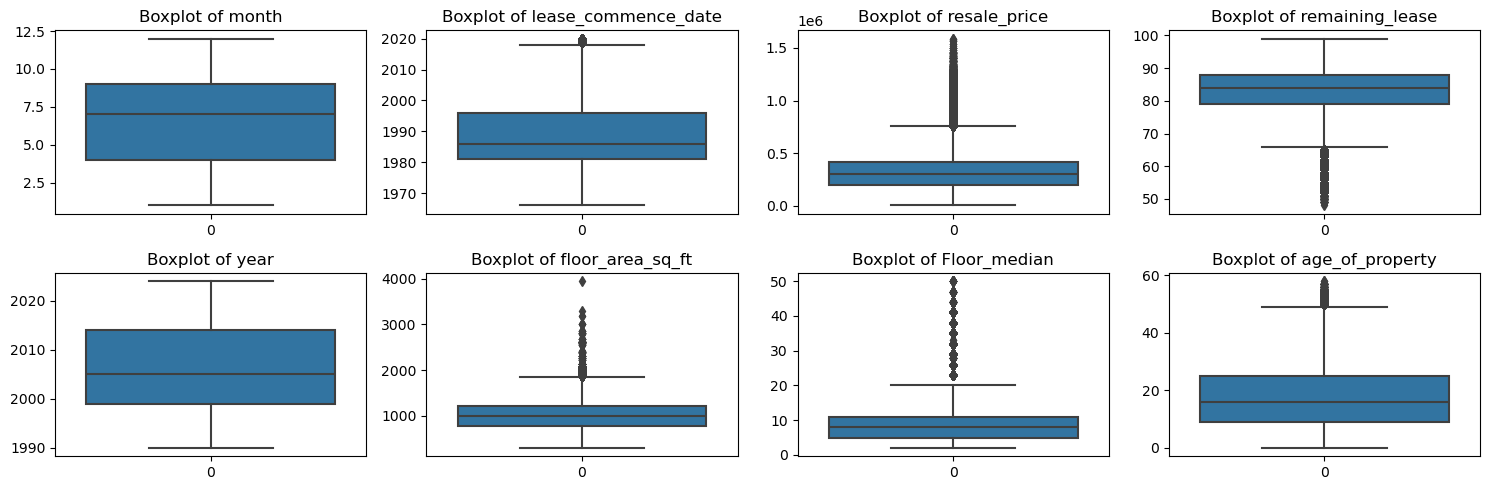

In [67]:
# Define the number of columns and rows for the subplot grid
num_cols = 4
num_rows = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(new_df.columns):
    sns.boxplot(new_df[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

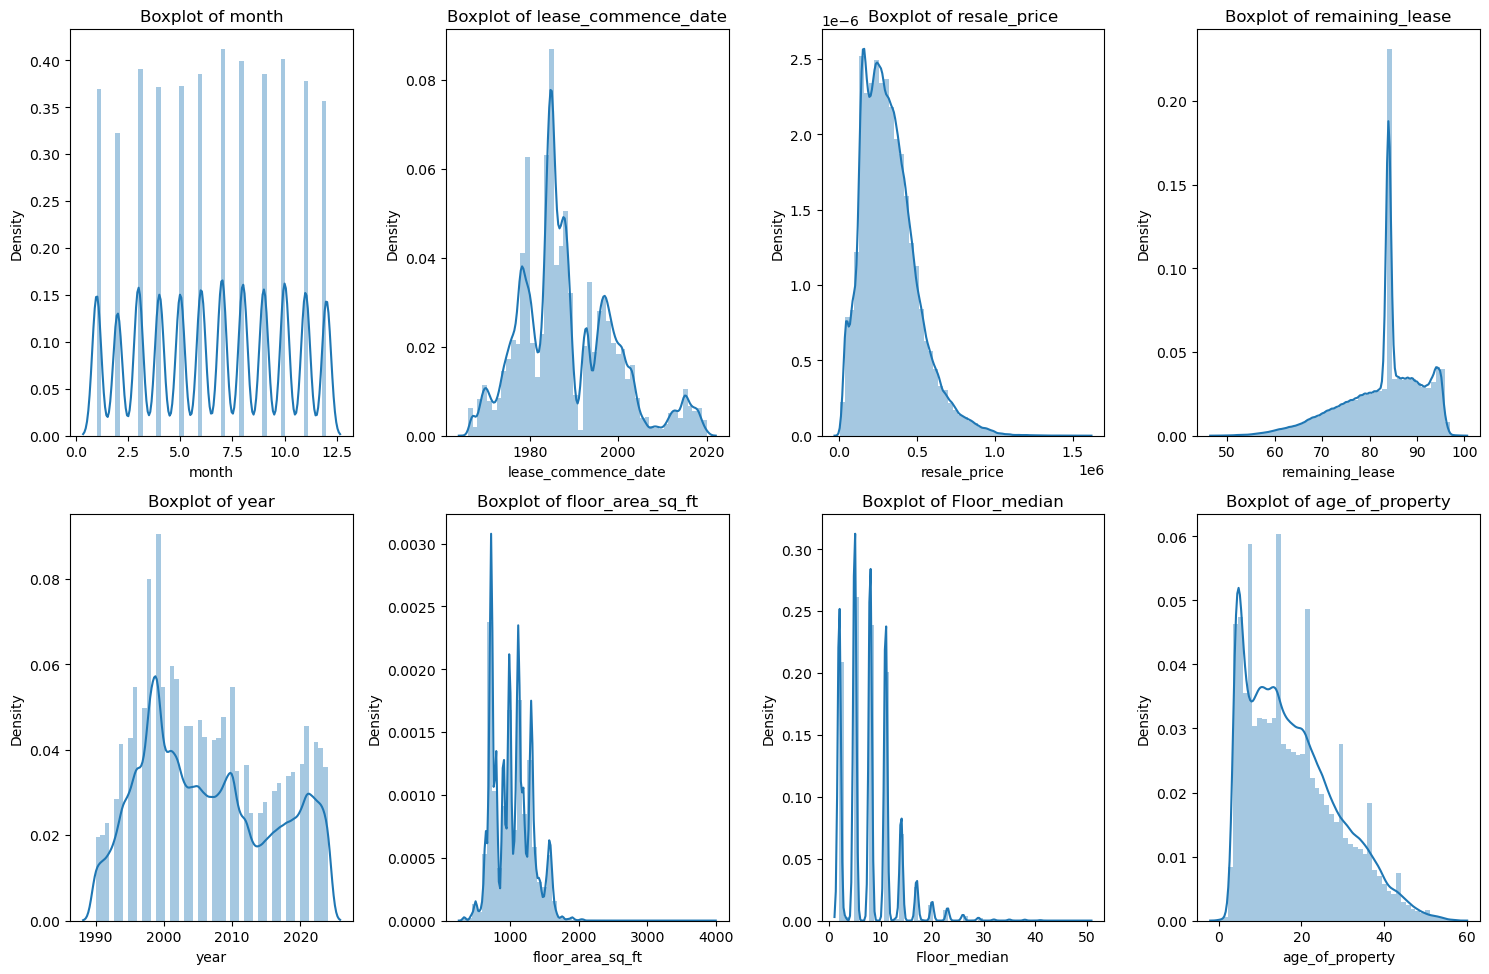

In [68]:
# Define the number of columns and rows for the subplot grid
num_cols = 4
num_rows = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(new_df.columns):
    sns.distplot(new_df[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

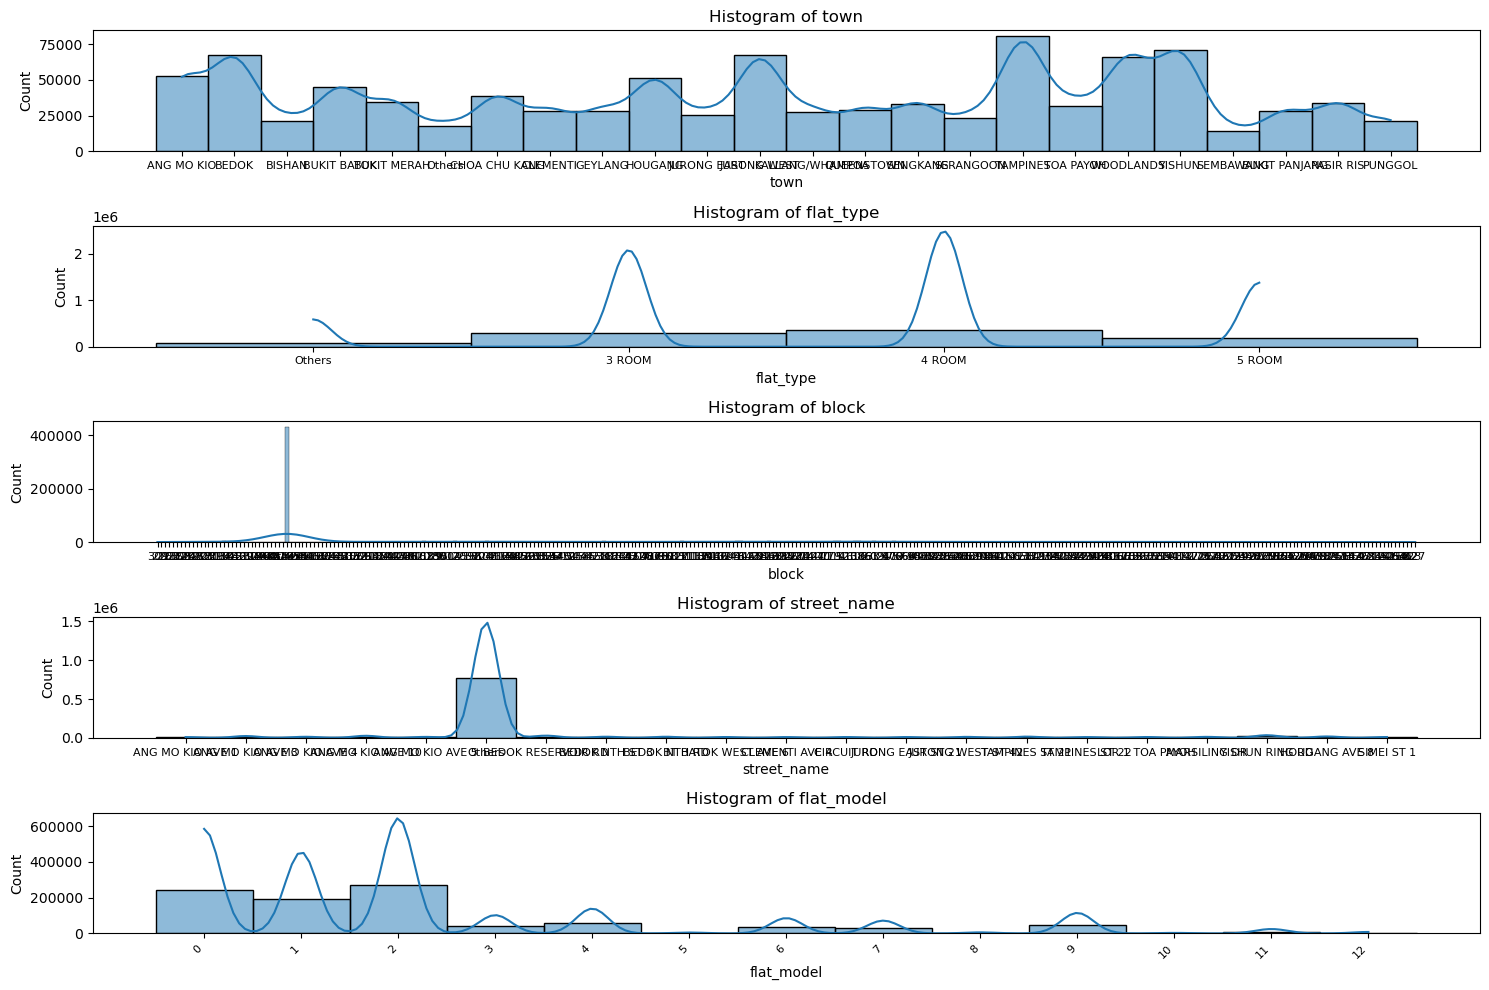

In [69]:
# Define the number of columns and rows for the subplot grid
num_cols = 1
num_rows = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(new_df_c.columns):
    sns.histplot(new_df_c[column], ax=axes[i], bins=10, kde=True)  # Replace with desired plot type
    axes[i].set_title(f'Histogram of {column}')
    axes[i].tick_params(axis='x', labelsize=8)
axes[i].set_xticklabels(axes[i].get_xticks(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

plt.show()

features = df[[ 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'remaining_lease', 'floor_area_sq_ft','Floor_median', 'age_of_property']]


    # Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=4)

# Fit the model
iso_forest.fit(features)

# Predict anomalies (-1 for anomalies, 1 for normal points)
df['anomaly'] = iso_forest.predict(features)


    
print(df)

df = df[df['anomaly'] != -1]
print(df)

In [70]:
df.dtypes


month                    int64
town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease          int32
year                     int64
storey_start             int64
storey_end               int64
floor_area_sq_ft         int32
age_of_property          int64
Floor_median             int32
dtype: object

In [71]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
floor_area_sq_ft       0
age_of_property        0
Floor_median           0
dtype: int64

In [72]:
df.head(55)

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,floor_area_sq_ft,age_of_property,Floor_median
0,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,1977,9000.0,86,1990,10,12,333,13,11
1,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,86,1990,4,6,333,13,5
2,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,1977,8000.0,86,1990,10,12,333,13,11
3,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,86,1990,7,9,333,13,8
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,New Generation,1976,47200.0,85,1990,4,6,785,14,5
5,1,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,67.0,New Generation,1977,46000.0,86,1990,1,3,721,13,2
6,1,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,67.0,New Generation,1977,42000.0,86,1990,7,9,721,13,8
7,1,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,New Generation,1977,38000.0,86,1990,10,12,721,13,11
8,1,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,New Generation,1977,40000.0,86,1990,4,6,721,13,5
9,1,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,67.0,New Generation,1977,47000.0,86,1990,1,3,721,13,2


# Define the number of columns and rows for the subplot grid
num_cols = 7
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,20))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(df_iso.columns):
    sns.boxplot(data =df_iso, y=df_iso[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column} after Isolationforest')

# Adjust layout
plt.tight_layout()
plt.show()

# Define the number of columns and rows for the subplot grid
num_cols = 1
num_rows = 7

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,20))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(df_iso.columns):
    sns.distplot(df_iso[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column} after Isolationforest')

# Adjust layout
plt.tight_layout()
plt.show()

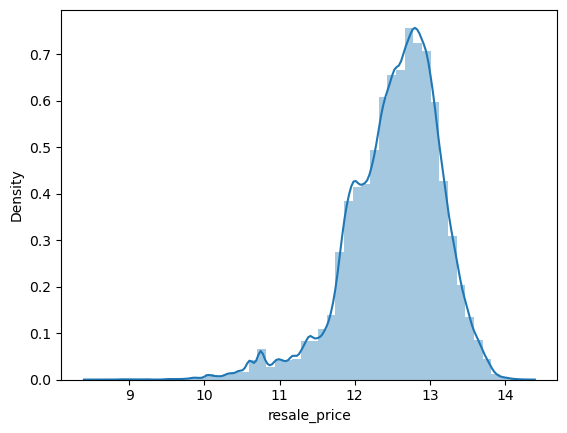

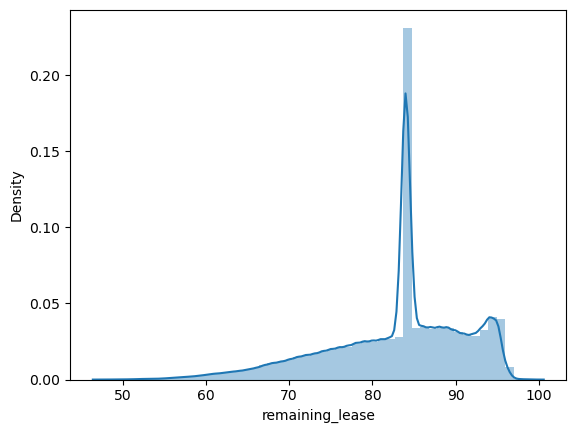

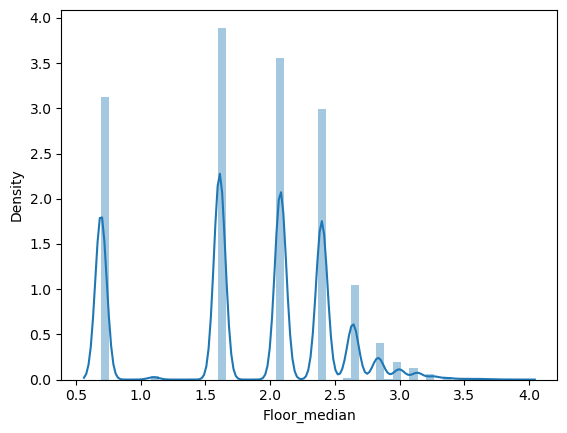

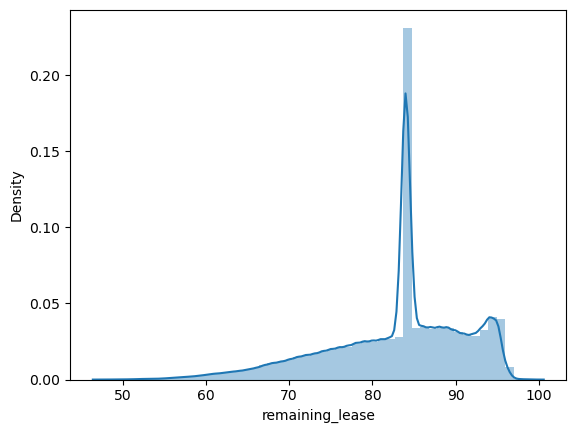

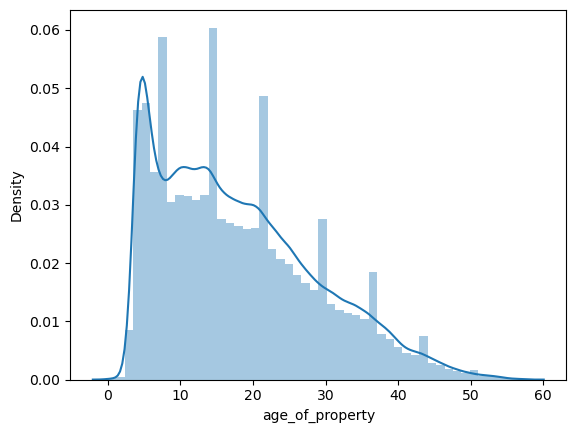

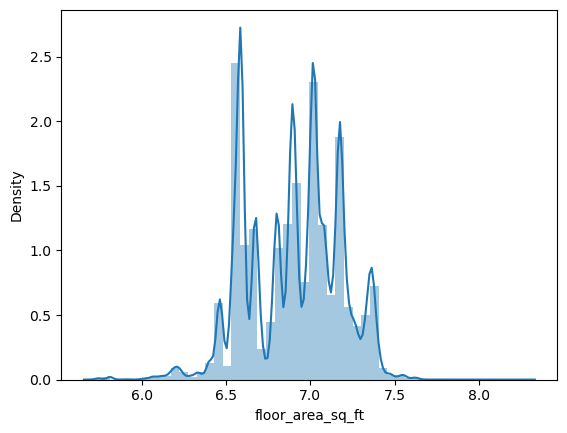

In [73]:
##data transformation using log function


df['resale_price'] = np.log(df['resale_price'])
sns.distplot(df['resale_price'])
plt.show()

df['lease_commence_date'] = np.log(df['lease_commence_date'])
sns.distplot(df['remaining_lease'])
plt.show()


df['Floor_median'] = np.log(df['Floor_median'])
sns.distplot(df['Floor_median'])
plt.show()

df['Floor_median'] = np.log(df['remaining_lease'])
sns.distplot(df['remaining_lease'])
plt.show()

df['Floor_median'] = np.log(df['age_of_property'])
sns.distplot(df['age_of_property'])
plt.show()

df['floor_area_sq_ft'] = np.log(df['floor_area_sq_ft'])
sns.distplot(df['floor_area_sq_ft'])
plt.show()



In [74]:

Numericaldata_ = ['lease_commence_date', 'resale_price', 'remaining_lease', 'Floor_median', 'age_of_property', 'floor_area_sq_ft']
new_df_ = df[Numericaldata_]
new_df_.head()

,lease_commence_date,resale_price,remaining_lease,Floor_median,age_of_property,floor_area_sq_ft
0,7.589336,9.104980,86,2.564949,13,5.808142
1,7.589336,8.699515,86,2.564949,13,5.808142
2,7.589336,8.987197,86,2.564949,13,5.808142
3,7.589336,8.699515,86,2.564949,13,5.808142
4,7.588830,10.762149,85,2.639057,14,6.665684


In [75]:
print(new_df_.columns)

Index(['lease_commence_date', 'resale_price', 'remaining_lease',
       'Floor_median', 'age_of_property', 'floor_area_sq_ft'],
      dtype='object')


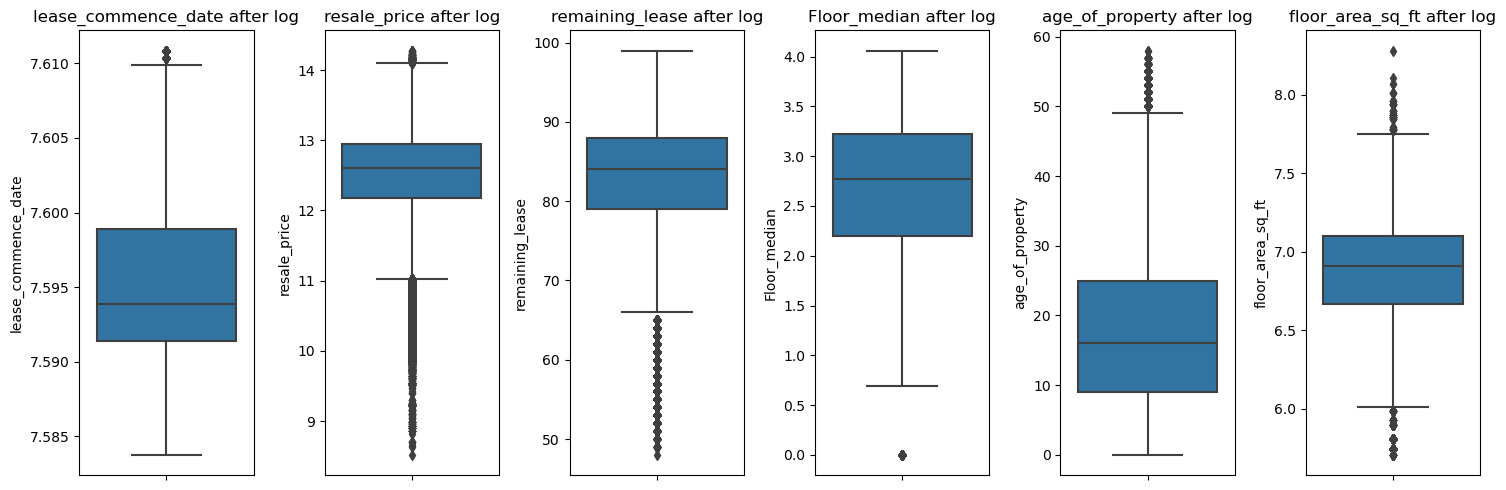

In [76]:
# Define the number of columns and rows for the subplot grid
num_cols = 6
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(new_df_.columns):
    sns.boxplot(data =new_df_, y=new_df_[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column} after log')

# Adjust layout
plt.tight_layout()
plt.show()

In [77]:

def outlier(df, column):
   
    # Step 1: Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Step 2: Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # If you prefer to cap the outliers instead of removing:
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
# Filter out the outliers
    #df[column] = df[df[column] >= lower_bound & df[column] <= upper_bound ]

In [78]:
outlier(df,'remaining_lease')
outlier(df,'lease_commence_date')
outlier(df,'resale_price')
outlier(df,'Floor_median')
outlier(df,'age_of_property')
outlier(df,'floor_area_sq_ft')


In [79]:
df.shape

(938218, 16)

In [80]:
Outliers = ['lease_commence_date', 'remaining_lease', 'resale_price', 'Floor_median','age_of_property', 'floor_area_sq_ft']
df_o = df[Outliers]
df_o.head()

,lease_commence_date,remaining_lease,resale_price,Floor_median,age_of_property,floor_area_sq_ft
0,7.589336,86.0,11.029872,2.564949,13,6.009226
1,7.589336,86.0,11.029872,2.564949,13,6.009226
2,7.589336,86.0,11.029872,2.564949,13,6.009226
3,7.589336,86.0,11.029872,2.564949,13,6.009226
4,7.588830,85.0,11.029872,2.639057,14,6.665684


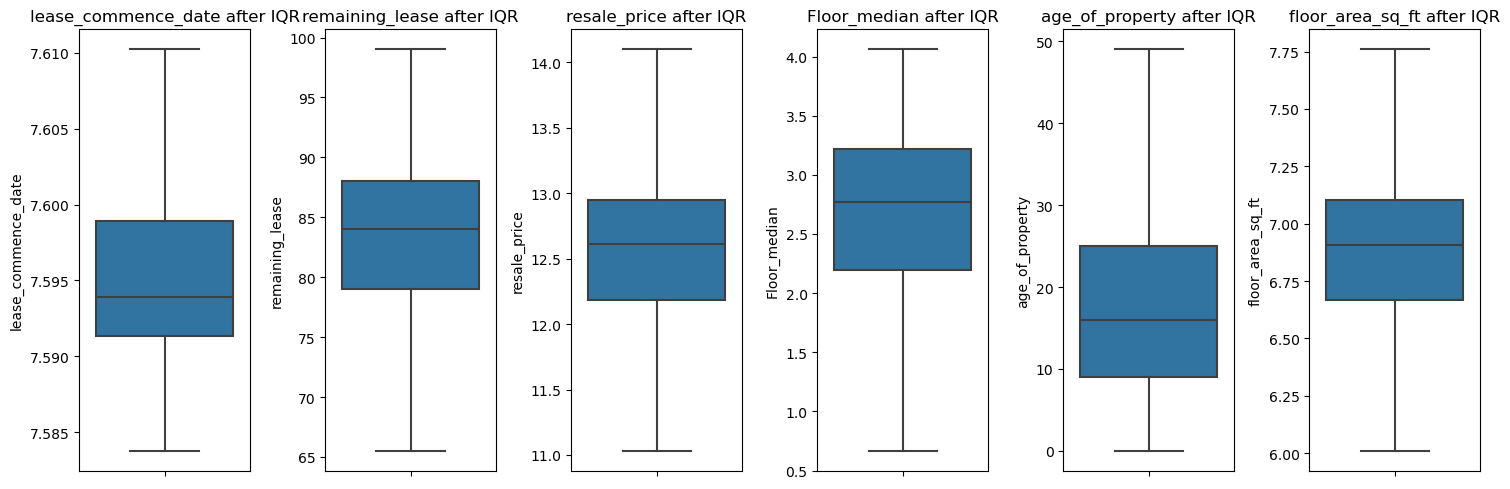

In [81]:

# Define the number of columns and rows for the subplot grid
num_cols = 6
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(df_o.columns):
    sns.boxplot(data =df_o, y=df_o[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column} after IQR')

# Adjust layout
plt.tight_layout()
plt.show()


In [82]:
Numericaldata_final = ['month', 'lease_commence_date', 'resale_price', 'remaining_lease', 'year', 'floor_area_sq_ft','Floor_median', 'age_of_property']
df_final= df[Numericaldata_final]


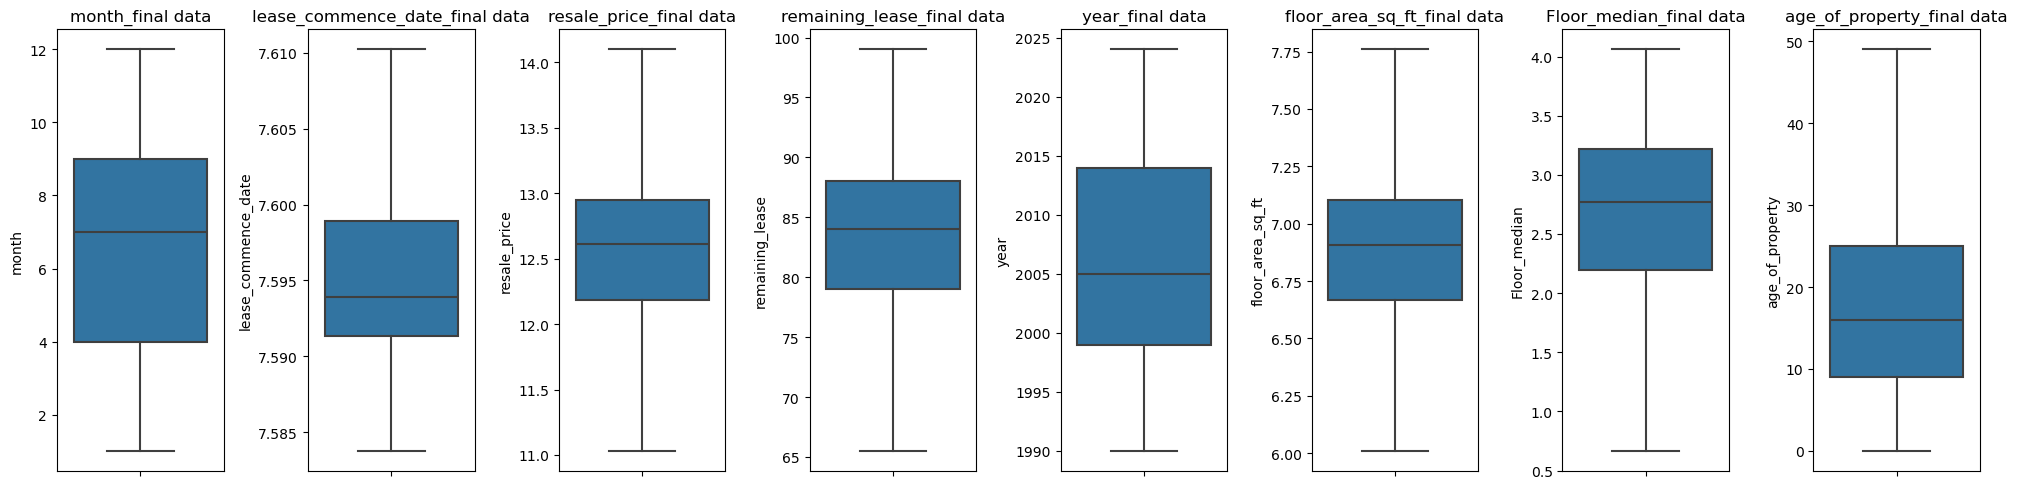

In [83]:

# Define the number of columns and rows for the subplot grid
num_cols = 8
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,5))

# Flatten the axes array for easy indexing
#axes = axes.flatten()

# Loop through the DataFrame columns and plot
for i, column in enumerate(df_final.columns):
    sns.boxplot(data =df_final, y=df_final[column], ax=axes[i])  # Replace with desired plot type
    axes[i].set_title(f'{column}_final data')

# Adjust layout
plt.tight_layout()
plt.show()


In [84]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'year', 'storey_start', 'storey_end', 'floor_area_sq_ft',
       'age_of_property', 'Floor_median'],
      dtype='object')

In [85]:
#drop the columns 
#df.drop(columns=['storey_start','storey_end'],inplace=True)


In [86]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,floor_area_sq_ft,age_of_property,Floor_median
0,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,7.589336,11.029872,86.0,1990,10,12,6.009226,13,2.564949
1,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,7.589336,11.029872,86.0,1990,4,6,6.009226,13,2.564949
2,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,7.589336,11.029872,86.0,1990,10,12,6.009226,13,2.564949
3,1,ANG MO KIO,Others,309,ANG MO KIO AVE 1,31.0,Improved,7.589336,11.029872,86.0,1990,7,9,6.009226,13,2.564949
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,New Generation,7.588830,11.029872,85.0,1990,4,6,6.665684,14,2.639057


In [87]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df['town'] = OE.fit_transform(df[['town']])
print(df)
OE1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['flat_type'] = OE1.fit_transform(df[['flat_type']])

OE2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['block'] = OE2.fit_transform(df[['block']])

OE3 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['street_name'] = OE3.fit_transform(df[['street_name']])

OE4 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['flat_model'] = OE4.fit_transform(df[['flat_model']])


        month  town flat_type   block       street_name  floor_area_sqm  \
0           1   0.0    Others     309  ANG MO KIO AVE 1            31.0   
1           1   0.0    Others     309  ANG MO KIO AVE 1            31.0   
2           1   0.0    Others     309  ANG MO KIO AVE 1            31.0   
3           1   0.0    Others     309  ANG MO KIO AVE 1            31.0   
4           1   0.0    3 ROOM     216  ANG MO KIO AVE 1            73.0   
...       ...   ...       ...     ...               ...             ...   
938264     10  23.0    5 ROOM  Others            Others           122.0   
938265     10  23.0    Others  Others            Others           164.0   
938266     10  23.0    Others  Others            Others           164.0   
938267     10  23.0    Others  Others    YISHUN RING RD           145.0   
938268     10  23.0    Others  Others            Others           142.0   

            flat_model  lease_commence_date  resale_price  remaining_lease  \
0             Improve

In [88]:
df['town'].value_counts()

town
20.0    80715
23.0    70785
11.0    67440
1.0     67181
22.0    66330
0.0     52522
9.0     51317
3.0     45128
6.0     38834
4.0     34758
14.0    33464
18.0    33354
21.0    31870
16.0    29060
8.0     28468
7.0     28268
5.0     28038
12.0    27612
10.0    25010
19.0    23008
15.0    21490
2.0     21424
13.0    17923
17.0    14219
Name: count, dtype: int64

In [89]:
df['flat_type'].value_counts()

flat_type
1.0    357111
0.0    298695
2.0    198026
3.0     84386
Name: count, dtype: int64

In [90]:
df['block'].value_counts()

block
321.0    430163
86.0       4620
0.0        4079
12.0       3442
2.0        3429
          ...  
136.0      1013
135.0      1008
300.0      1007
241.0      1006
277.0      1000
Name: count, Length: 322, dtype: int64

In [91]:
df['street_name'].value_counts()

street_name
16.0    776655
20.0     17742
7.0      14834
1.0      13913
2.0      12240
11.0      9419
18.0      8350
6.0       7627
5.0       7526
3.0       7276
15.0      6698
13.0      6639
4.0       6469
14.0      5583
8.0       5563
17.0      5561
9.0       5431
12.0      5370
10.0      5118
0.0       5115
19.0      5089
Name: count, dtype: int64

In [92]:
df['flat_model'].value_counts()

flat_model
5.0     269449
3.0     244440
8.0     190274
11.0     57962
10.0     47983
12.0     42800
1.0      35835
4.0      29949
7.0      10275
2.0       3426
9.0       2462
6.0       2093
0.0       1270
Name: count, dtype: int64

In [93]:
df['block'].value_counts()

block
321.0    430163
86.0       4620
0.0        4079
12.0       3442
2.0        3429
          ...  
136.0      1013
135.0      1008
300.0      1007
241.0      1006
277.0      1000
Name: count, Length: 322, dtype: int64

In [94]:
df.drop(columns=['storey_start','storey_end'],inplace=True)

In [95]:
df.dtypes

month                    int64
town                   float64
flat_type              float64
block                  float64
street_name            float64
floor_area_sqm         float64
flat_model             float64
lease_commence_date    float64
resale_price           float64
remaining_lease        float64
year                     int64
floor_area_sq_ft       float64
age_of_property          int64
Floor_median           float64
dtype: object

In [96]:
df.drop(columns=['floor_area_sqm', 'lease_commence_date', 'year'],inplace=True)

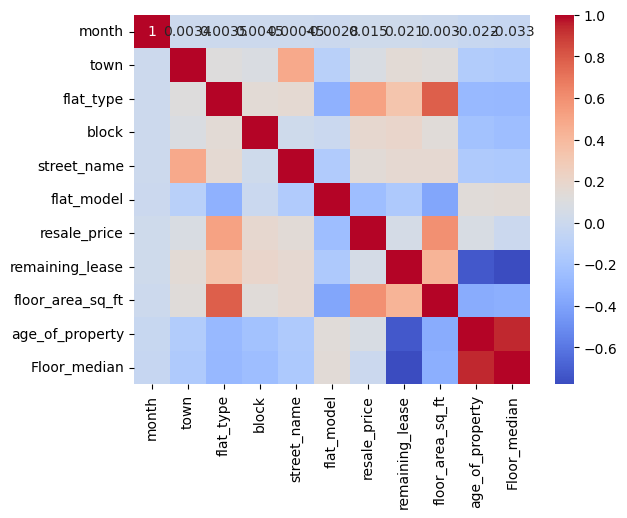

In [97]:
sns.heatmap((df).corr(), cmap='coolwarm', annot=True)
plt.show()

In [98]:
## Regression modelling

###### df.columns

In [99]:
#split data into X, y
x=df[['town','flat_type', 'block', 'flat_model', 'remaining_lease', 'floor_area_sq_ft', 'age_of_property', 'Floor_median','street_name']]
y=df['resale_price']

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaler.transform(x)

array([[-1.55058176,  2.05005281, -0.53147116, ..., -0.46186599,
        -0.17357636, -4.11140521],
       [-1.55058176,  2.05005281, -0.53147116, ..., -0.46186599,
        -0.17357636, -4.11140521],
       [-1.55058176,  2.05005281, -0.53147116, ..., -0.46186599,
        -0.17357636, -4.11140521],
       ...,
       [ 1.46184485,  2.05005281,  0.84773534, ...,  1.30221424,
         1.14922508,  0.30533446],
       [ 1.46184485,  2.05005281,  0.84773534, ...,  1.67359955,
         1.322189  ,  1.40951938],
       [ 1.46184485,  2.05005281,  0.84773534, ...,  1.76644588,
         1.36242428,  0.30533446]])

In [101]:
df.shape

(938218, 11)

In [102]:
#df['target_binned'] = pd.qcut(df['resale_price'], q=20, labels=False)
df['target_binned_'] = pd.qcut(df['resale_price'], q=10, labels=False)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=df['target_binned_'])
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=df['target_binned_'])

In [104]:
x_train.head()

,town,flat_type,block,flat_model,remaining_lease,floor_area_sq_ft,age_of_property,Floor_median,street_name
290633,10.0,2.0,18.0,3.0,80.0,7.163172,19,2.944439,16.0
925350,8.0,2.0,218.0,3.0,84.0,7.180070,32,3.465736,16.0
116815,20.0,2.0,321.0,3.0,89.0,7.180070,10,2.302585,16.0
200327,0.0,1.0,321.0,8.0,81.0,6.886532,18,2.890372,16.0
629220,23.0,0.0,201.0,5.0,78.0,6.679599,21,3.044522,20.0


In [105]:
x_train.shape

(750574, 9)

In [106]:
x_test.shape

(187644, 9)

In [107]:
y_train.shape

(750574,)

In [108]:
y_test.shape

(187644,)

In [109]:

lin = LinearRegression()
lin.fit(x_train, y_train)
train_pred = lin.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = lin.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.4007807903669732, 0.4001625210377422)
R2: (0.522250132718856, 0.5234002924149298)


In [110]:
from sklearn.tree import DecisionTreeRegressor
import sklearn
dc_r = DecisionTreeRegressor()
dc_r.fit(x_train, y_train)
train_pred = dc_r.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = dc_r.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.09599689970051535, 0.13292381901355094)
R2: (0.9725904948410348, 0.9474120100229709)


In [111]:
dc_ = DecisionTreeRegressor(max_depth= 20, min_samples_split= 8)
dc_.fit(x_train, y_train)
train_pred = dc_.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = dc_.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.12334176480265208, 0.14141105538952384)
R2: (0.9547511968385629, 0.9404820892657729)


In [153]:
dc_c= DecisionTreeRegressor(max_depth= 12, min_samples_split= 8)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dc_c, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
print("Mean Squared Error for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())

Mean Squared Error for each fold: [0.04701868 0.0479869  0.04670163 0.04806365 0.04706267]
Average MSE: 0.04736670533009689


In [154]:
dc_c.fit(x,y)

DecisionTreeRegressor(max_depth=12, min_samples_split=8)

In [155]:
from sklearn.model_selection import GridSearchCV
Ss = {'max_depth': [3,4,7,9,10,12,14,16, 20,24,26], 'min_samples_split': [4,6,8,10,12]}
grid = GridSearchCV(dc_r, param_grid=Ss, cv=8)
grid_search = grid.fit(x,y)
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 12}


In [156]:
rf = RandomForestRegressor(max_depth= 20, min_samples_split= 8)
rf.fit(x_train, y_train)
train_pred = rf.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = rf.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.11787324599898799, 0.1318125154305759)
R2: (0.9586903632189305, 0.9482084558898201)


In [157]:
pred

array([12.83867809, 12.74976373, 12.35243074, ..., 12.47401751,
       13.02034363, 12.6263495 ])

In [158]:
from sklearn.linear_model import Lasso, Ridge
rid = Ridge(alpha = 1)
rid.fit(x_train, y_train)
train_pred = rid.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = rid.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.4006394247417377, 0.4007283699402119)
R2: (0.5227694283750715, 0.5213194922730098)


In [159]:
rlass = Lasso(alpha = 12)
rlass.fit(x_train, y_train)
train_pred = rlass.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = rlass.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.5799486677415344, 0.5791982262044245)
R2: (0.0, -2.2383567221950784e-08)


In [117]:
df1 = df.sample(frac=0.5, random_state=1)  # Randomly select 50% of the data for df1
df2 = df.drop(df1.index)   

In [118]:
df1.shape

(469109, 12)

In [119]:
df1['target_binned_'] = pd.qcut(df1['resale_price'], q=10, labels=False)

In [120]:
#split data into X, y
x1=df1[['town','flat_type', 'block', 'flat_model', 'remaining_lease', 'floor_area_sq_ft', 'age_of_property', 'Floor_median','street_name']]
y1=df1['resale_price']


In [121]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.3, stratify=df1['target_binned_'])
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=df['target_binned_'])

In [122]:
dc_1 = DecisionTreeRegressor(max_depth= 20, min_samples_split= 8)
dc_1.fit(x_train1, y_train1)
train_pred = dc_1.predict(x_train1)
mse_train1 = math.sqrt(mean_squared_error(y_train1, train_pred))
pred = dc_1.predict(x_test1)
mse_test1 = math.sqrt(mean_squared_error(y_test1, pred))
r2_train1 = r2_score(y_train1, train_pred)
r2_test1 = r2_score(y_test1, pred)
print(f'RMSE: {mse_train1, mse_test1}')
print(f'R2: {r2_train1, r2_test1}')

RMSE: (0.12220507359153933, 0.15654805270817332)
R2: (0.9555486704261192, 0.9271302907095028)


In [123]:
# Predict the status for a new sample


input_data = {
  
   'town': ['ANG MO KIO'],
   'flat_type': ['2 ROOM'],
   'block': ['172'],
   'flat_model': ['Improved'],
#'lease_commence_date': [1986],
   'remaining_lease': [73.0],
   'floor_area_sq_ft': [450],
   'age_of_property': [26],
   'Floor_median': [8.0],
#'year': [2012],
    'street_name' : ['ANG MO KIO AVE 4'],
#'storey_start': [6],
#'storey_end': [10]
}

input_data = pd.DataFrame(input_data)

#use ordinal encoder to convert categorical data into numerical data.

input_data['town'] = OE.transform(input_data[['town']])


input_data['flat_type'] = OE1.transform(input_data[['flat_type']])

input_data['block'] = OE2.transform(input_data[['block']])

input_data['flat_model'] = OE4.transform(input_data[['flat_model']])

input_data['street_name'] = OE3.transform(input_data[['street_name']])

#input_data['lease_commence_date'] = np.log(input_data['lease_commence_date'])

input_data['remaining_lease'] = np.log(input_data['remaining_lease'])

input_data['Floor_median'] = np.log(input_data['Floor_median'])

input_data['age_of_property'] = np.log(input_data['age_of_property'])

input_data['floor_area_sq_ft'] = np.log(input_data['floor_area_sq_ft'])
##data transformation using log function





input_data_=input_data[['town','flat_type', 'block', 'flat_model', 'remaining_lease', 'floor_area_sq_ft', 'age_of_property', 'Floor_median','street_name']]

input_data_s = scaler.transform(input_data_)     
new_pred = dc_1.predict(input_data_s)
print(new_pred)
print(np.exp(new_pred))


[13.11642568]
[497039.94963738]


In [169]:
df2['target_binned_'] = pd.qcut(df2['resale_price'], q=10, labels=False)

In [170]:
#split data into X, y
x2=df2[['town','flat_type', 'block', 'flat_model', 'remaining_lease', 'floor_area_sq_ft', 'age_of_property', 'Floor_median','street_name']]
y2=df2['resale_price']

In [171]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size = 0.3, stratify=df2['target_binned_'])
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=df['target_binned_'])

In [172]:
dc_2 = DecisionTreeRegressor(max_depth= 12, min_samples_split= 8)
dc_2.fit(x_train2, y_train2)
train_pred = dc_2.predict(x_train2)
mse_train2 = math.sqrt(mean_squared_error(y_train2, train_pred))
pred = dc_1.predict(x_test2)
mse_test2 = math.sqrt(mean_squared_error(y_test2, pred))
r2_train2 = r2_score(y_train2, train_pred)
r2_test2 = r2_score(y_test2, pred)
print(f'RMSE: {mse_train2, mse_test2}')
print(f'R2: {r2_train2, r2_test2}')

RMSE: (0.2131689907436582, 0.15568362412470413)
R2: (0.864803494347701, 0.9279962305509861)


In [125]:
# Predict the status for a new sample


input_data = {
  
   'town': ['ANG MO KIO'],
   'flat_type': ['3 ROOM'],
   'block': ['108'],
   'flat_model': ['New Generation'],
#'lease_commence_date': [1986],
   'remaining_lease': [68.0],
#'floor_area_sqm': [45],
   'age_of_property': [39],
   'Floor_median': [2.0],
#'year': [2017],
    'street_name' : ['ANG MO KIO AVE 4'],
    'floor_area_sq_ft': [450]
}

input_data = pd.DataFrame(input_data)

#use ordinal encoder to convert categorical data into numerical data.

input_data['town'] = OE.transform(input_data[['town']])


input_data['flat_type'] = OE1.transform(input_data[['flat_type']])

input_data['block'] = OE2.transform(input_data[['block']])

input_data['flat_model'] = OE4.transform(input_data[['flat_model']])

input_data['street_name'] = OE3.transform(input_data[['street_name']])

#input_data['lease_commence_date'] = np.log(input_data['lease_commence_date'])

input_data['remaining_lease'] = np.log(input_data['remaining_lease'])

input_data['Floor_median'] = np.log(input_data['Floor_median'])

input_data['age_of_property'] = np.log(input_data['age_of_property'])

input_data['floor_area_sq_ft'] = np.log(input_data['floor_area_sq_ft'])

#input_data['floor_area_sqm'] = np.log(input_data['floor_area_sqm'])
##data transformation using log function





input_data_=input_data[['town','flat_type', 'block', 'flat_model', 'remaining_lease', 'floor_area_sq_ft', 'age_of_property', 'Floor_median','street_name']]

input_data_s = scaler.transform(input_data_)     
new_pred = dc_2.predict(input_data_s)
print(new_pred)
print(np.exp(new_pred))


NameError: name 'dc_2' is not defined

In [112]:
file_path = 'C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/dcr.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(dc_, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE.pkl', 'wb') as file:
    pickle.dump(OE, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE1.pkl', 'wb') as file:
    pickle.dump(OE1, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE2.pkl', 'wb') as file:
    pickle.dump(OE2, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE3.pkl', 'wb') as file:
    pickle.dump(OE3, file)

with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/OE4.pkl', 'wb') as file:
    pickle.dump(OE4, file)
    
with open('C:/Users/rajij/Streamlit_Home Page/Singapore flat resale model/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [113]:
from joblib import dump

# Save the model
dump(dc_, 'DCR.joblib')


['DCR.joblib']

In [114]:
dump(OE, 'OEJ.joblib')


['OEJ.joblib']

In [115]:
dump(OE1, 'OEJ1.joblib')


['OEJ1.joblib']

In [116]:
dump(OE2, 'OEJ2.joblib')


['OEJ2.joblib']

In [117]:
dump(OE3, 'OEJ3.joblib')


['OEJ3.joblib']

In [118]:
dump(OE4, 'OEJ4.joblib')


['OEJ4.joblib']

In [119]:
dump(scaler, 'scalerJ.joblib')

['scalerJ.joblib']

In [120]:
import sklearn
print(sklearn.__version__)

1.2.2


In [341]:
import os

print("Current working directory:", os.getcwd())

Current working directory: C:\Users\rajij\GUVI
